<a href="https://colab.research.google.com/github/Nidhi-Sinha01/AIML-mini-project_BoomNi/blob/main/AI%26ML_MINI_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image_classification under the guidence of Sanjay Sir for AI&ML Mini Project


## Importing libraries

In [ ]:

import tensorflow as tf

# Display the version
print(tf.__version__)

# other imports
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.layers import GlobalMaxPooling2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import Model

2.13.0


**Conv2D** stands for "2D Convolutional Layer," and it is a fundamental building block in deep learning models, particularly in Convolutional Neural Networks (CNNs). The primary use of Conv2D is for feature extraction in image and video processing tasks.

** Dense layers** in artificial intelligence and deep learning play a crucial role in feature learning, representation, and modeling complex relationships in data. They are a fundamental component of neural networks and are used for a wide range of tasks, including image classification, natural language processing, regression, and more.

adds a Flatten layer to our neural network model.
The purpose of the Flatten layer is to transform the multi-dimensional output from previous layers into a one-dimensional vector.


use of Dropout Layers


*   The Dropout layer randomly sets a fraction of the input units to zero during each update at training time, which helps to prevent overfitting
*   ex:model.add(Dropout(0.2))
    The parameter 0.2 specifies the dropout rate. In this case, 20% of the input units will be randomly set to zero during each training update.
Common values are in the range of 0.2 to 0.5.


use of GlobalMaxPooling2D

*   GlobalMaxPooling2D is a layer commonly used in Convolutional Neural Networks (CNNs) and deep learning models for various computer vision tasks. Its primary purpose is to reduce the height nad widdth of image while retaining the most important information.
*    By taking the maximum value, it retains the most important and distinctive information from each feature map, effectively highlighting the presence of specific features



use of Batch_Normalization


*   Batch Normalization is a technique used in artificial neural networks, including deep neural networks, to improve training stability and convergence speed
*   Normalization of Activations: During the training of deep neural networks, the distribution of activations (the output of neurons in intermediate layers) can shift and change significantly. This is known as "internal covariate shift." Such shifts can slow down training because it requires the network to adapt to these changes, often leading to longer training times and convergence challenges.



In [ ]:
# we are  Loading in the data
# we have used cifar10 a inbuild datasets
cifar10 = tf.keras.datasets.cifar10

# Distribute it to train and test set
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)


170498071/170498071 [==============================] - 2s 0us/step
(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)


In [ ]:
# Reducing the pixel values
x_train, x_test = x_train / 255.0, x_test / 255.0

# flatten the label values
y_train, y_test = y_train.flatten(), y_test.flatten()


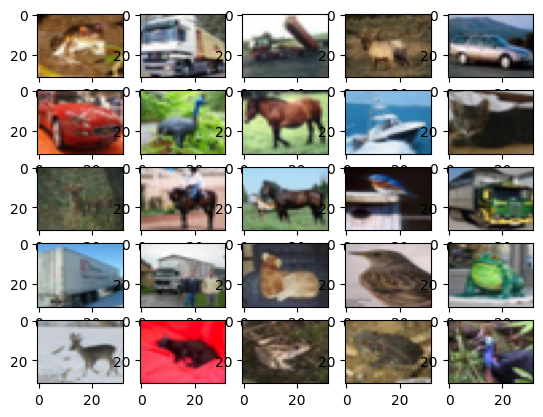

In [ ]:
# visualize data by plotting images
fig, ax = plt.subplots(5, 5)
k = 0

for i in range(5):
	for j in range(5):
		ax[i][j].imshow(x_train[k], aspect='auto')
		k += 1

plt.show()


In [ ]:
from IPython.display import Image

# Replace 'your_gif_file.gif' with the actual filename of your GIF
Image(filename='/content/gif.gif')


In [ ]:
# number of classes
K = len(set(y_train))

# calculating the total number of classes
# for output layer
print("number of classes:", K)

# Building  the model using the functional API
# input layer are
i = Input(shape=x_train[0].shape)  #This line creates an input tensor for your neural network. Input is a Keras function that defines the input shape of your data.
x = Conv2D(32, (3, 3), activation='relu', padding='same')(i) #This line defines a convolutional layer in your neural network and applies it to the input tensor i.
                                                              #Here's what each part of this line does:
x = BatchNormalization()(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)

x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)

x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)

x = Flatten()(x)
x = Dropout(0.2)(x)

# Hidden layer
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)

# last hidden layer i.e.. output layer
x = Dense(K, activation='softmax')(x)

model = Model(i, x)

# model description
model.summary()



number of classes: 10
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (Batch  (None, 32, 32, 32)        128       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_1 (Bat  (None, 32, 32, 32)        128       
 chNormalization)                                                
                                                                 
 max_pooling2d (MaxPooling2  (None, 16,

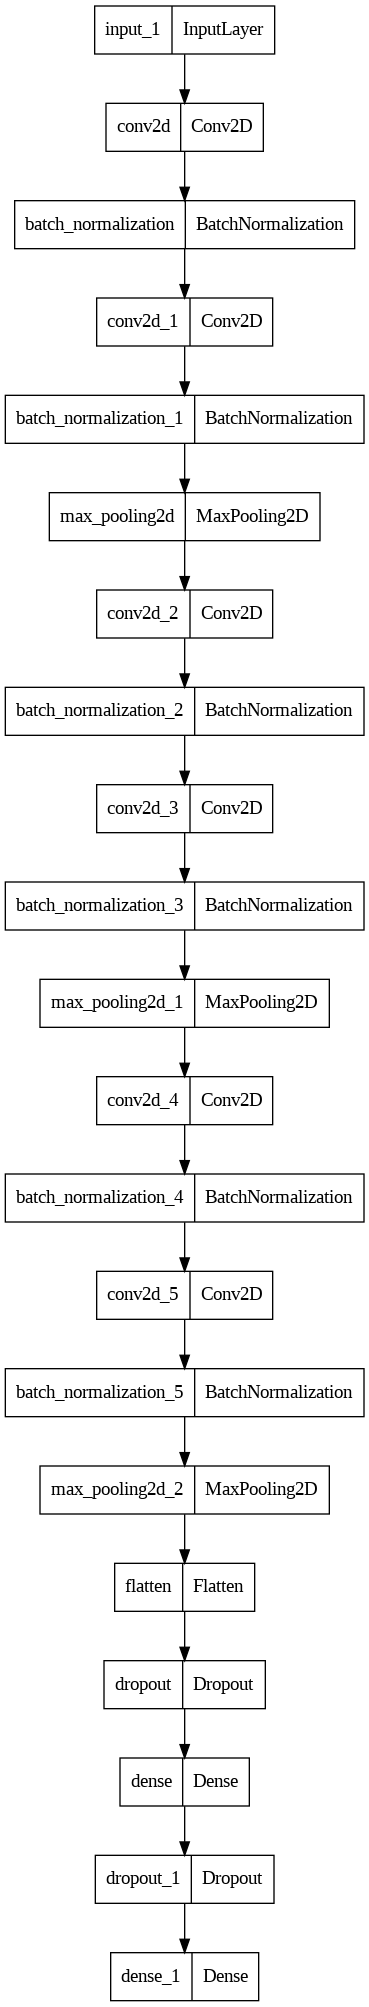

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(model, to_file='model.png')

In [ ]:
# Compile
model.compile(optimizer='adam',
			loss='sparse_categorical_crossentropy',
			metrics=['accuracy'])



In [ ]:
# Fit
r = model.fit(
x_train, y_train, validation_data=(x_test, y_test), epochs=200)


Epoch 1/200
1563/1563 [==============================] - 21s 8ms/step - loss: 1.3357 - accuracy: 0.5378 - val_loss: 1.1850 - val_accuracy: 0.6014
Epoch 2/200
1563/1563 [==============================] - 12s 8ms/step - loss: 0.8680 - accuracy: 0.7008 - val_loss: 1.0832 - val_accuracy: 0.6223
Epoch 3/200
1563/1563 [==============================] - 12s 8ms/step - loss: 0.7079 - accuracy: 0.7548 - val_loss: 0.7630 - val_accuracy: 0.7424
Epoch 4/200
1563/1563 [==============================] - 13s 8ms/step - loss: 0.5912 - accuracy: 0.7959 - val_loss: 0.7440 - val_accuracy: 0.7539
Epoch 5/200
1563/1563 [==============================] - 12s 8ms/step - loss: 0.5037 - accuracy: 0.8260 - val_loss: 0.6776 - val_accuracy: 0.7766
Epoch 6/200
1563/1563 [==============================] - 13s 8ms/step - loss: 0.4255 - accuracy: 0.8542 - val_loss: 0.5677 - val_accuracy: 0.8139
Epoch 7/200
1563/1563 [==============================] - 12s 8ms/step - loss: 0.3588 - accuracy: 0.8760 - val_loss: 0.6936 -

In [ ]:
model.save("Image_classification_SIC_Project.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:

# Fit with data augmentation
# Note: if you run this AFTER calling
# the previous model.fit()
# it will CONTINUE training where it left off
batch_size = 32   # this defines the batch size
data_generator = tf.keras.preprocessing.image.ImageDataGenerator( # data_generator = tf.keras.preprocessing.image.ImageDataGenerator(...): Here, an ImageDataGenerator object is created.
  width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True) # This object is used to perform data augmentation on the training data.
                                                                       #width_shift_range=0.1, height_shift_range=0.1: These parameters specify the range of horizontal and vertical shifts that can be applied to the images during data augmentation

train_generator = data_generator.flow(x_train, y_train, batch_size)
steps_per_epoch = x_train.shape[0] // batch_size

r = model.fit(train_generator, validation_data=(x_test, y_test),
              steps_per_epoch=steps_per_epoch, epochs=60)

Epoch 1/60
1562/1562 [==============================] - 36s 22ms/step - loss: 0.6243 - accuracy: 0.8135 - val_loss: 0.5174 - val_accuracy: 0.8407
Epoch 2/60
1562/1562 [==============================] - 35s 22ms/step - loss: 0.4747 - accuracy: 0.8499 - val_loss: 0.5068 - val_accuracy: 0.8440
Epoch 3/60
1562/1562 [==============================] - 34s 22ms/step - loss: 0.4439 - accuracy: 0.8588 - val_loss: 0.4808 - val_accuracy: 0.8562
Epoch 4/60
1562/1562 [==============================] - 35s 22ms/step - loss: 0.4149 - accuracy: 0.8672 - val_loss: 0.4839 - val_accuracy: 0.8510
Epoch 5/60
1562/1562 [==============================] - 35s 22ms/step - loss: 0.3945 - accuracy: 0.8729 - val_loss: 0.4649 - val_accuracy: 0.8550
Epoch 6/60
1562/1562 [==============================] - 34s 22ms/step - loss: 0.3775 - accuracy: 0.8777 - val_loss: 0.4448 - val_accuracy: 0.8578
Epoch 7/60
1562/1562 [==============================] - 37s 24ms/step - loss: 0.3703 - accuracy: 0.8810 - val_loss: 0.4540 -

In [ ]:
model.save("Image_classifications_SIC_Project_v1.h5")

In [ ]:
_,acc=model.evaluate(x_test,y_test)
pred=(acc*100)

313/313 [==============================] - 1s 4ms/step - loss: 0.4337 - accuracy: 0.8761


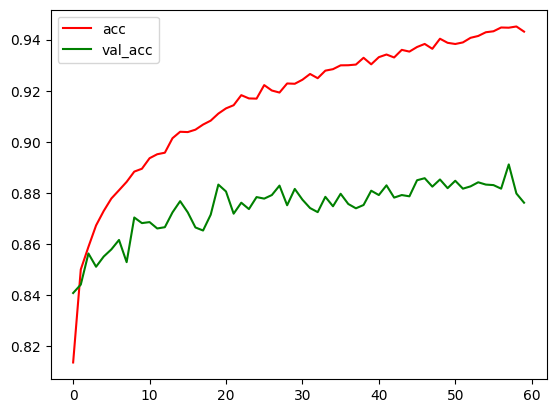

In [ ]:
# Plot accuracy per iteration
plt.plot(r.history['accuracy'], label='acc', color='red')
plt.plot(r.history['val_accuracy'], label='val_acc', color='green')
plt.legend()


In [ ]:
results={
   0:'aeroplane',
   1:'automobile',
   2:'bird',
   3:'cat',
   4:'deer',
   5:'dog',
   6:'frog',
   7:'animal',
   8:'ship',
   9:'truck'
}
from PIL import Image
import numpy as np
im=Image.open("/content/kingfisher-2046453_640.jpg")
# the input image is required to be in the shape of dataset, i.e (32,32,3)

im=im.resize((32,32))
im=np.expand_dims(im,axis=0)
im=np.array(im)
predictions = model.predict(im)
pred_class = np.argmax(predictions)
class_label = results[pred_class]

print(pred_class, class_label)

1/1 [==============================] - 0s 26ms/step
2 bird


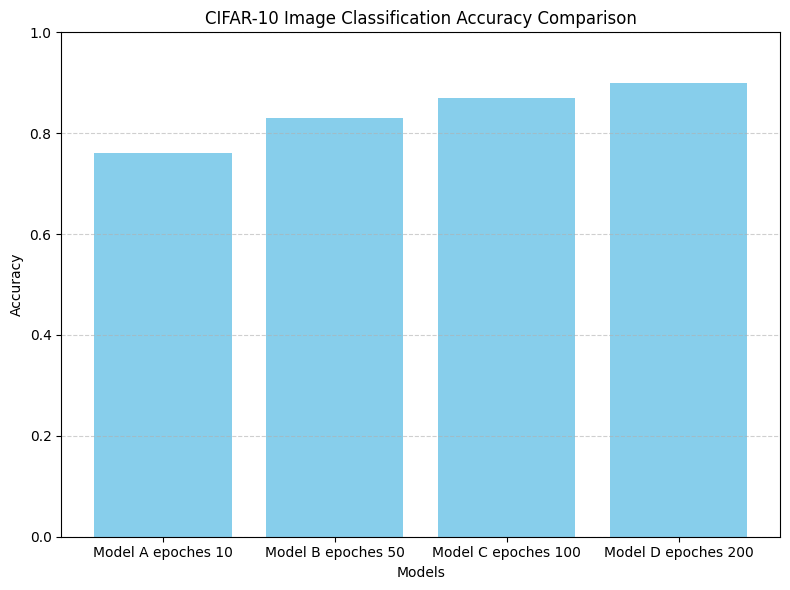

In [ ]:
import matplotlib.pyplot as plt

# List of model names or approaches
models = ["Model A epoches 10", "Model B epoches 50", "Model C epoches 100", "Model D epoches 200"]

# Corresponding accuracy scores
accuracy = [0.76, 0.83, 0.87, 0.90]

# Create a bar graph
plt.figure(figsize=(8, 6))
plt.bar(models, accuracy, color='skyblue')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('CIFAR-10 Image Classification Accuracy Comparison')
plt.ylim(0.0, 1.0)  # Set the y-axis limit between 0 and 1
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()

# Display the bar graph
plt.show()


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
